In [1]:
import numpy as np


np.random.seed(42)
from sklearn import datasets

### Dataset preparation


In [2]:
iris = datasets.load_iris()

x = iris.data[:, [0, 1]]
y = iris.target

class_names = iris.target_names
discription = iris.DESCR

In [3]:
print(f"x shape:\n{x.shape}")
print(f"y shape:\n{y.shape}")

x shape:
(150, 2)
y shape:
(150,)


### Dataset Split


In [4]:
num_samples = x.shape[0]
num_features = x.shape[1]
num_classes = len(class_names)  # y.shape = (150,)

print(f"num_samples: {num_samples}")
print(f"num_features: {num_features}")
print(f"num_classes: {num_classes}")

num_samples: 150
num_features: 2
num_classes: 3


In [5]:
test_size = num_samples // 3
train_size = num_samples - test_size

random_idxs = np.random.permutation(num_samples)

x_train = x[random_idxs[:train_size]]
y_train = y[random_idxs[:train_size]]

x_test = x[random_idxs[train_size:]]
y_test = y[random_idxs[train_size:]]

In [6]:
print(f"x_train.shape: {x_train.shape}")
print(f"y_train.shape: {y_train.shape}")

print(f"x_test.shape: {x_test.shape}")
print(f"y_test.shape: {y_test.shape}")

x_train.shape: (100, 2)
y_train.shape: (100,)
x_test.shape: (50, 2)
y_test.shape: (50,)


### KNN Model


In [7]:
from sklearn.neighbors import KNeighborsClassifier

In [8]:
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(x_train, y_train)

accuracy = clf.score(x_test, y_test)
print(f"acc: {accuracy}")

y_pred = clf.predict(x_test[:3])
print(f"y_pred: {y_pred}")

acc: 0.64
y_pred: [0 0 0]


### Hyper Parameters


In [9]:
n_neighbors = list(range(1, 11))  # [1, 2, 3, ..., 10]
weight_modes = ["uniform", "distance"]

In [10]:
for n in n_neighbors:
    for w in weight_modes:
        clf = KNeighborsClassifier(n_neighbors=n, weights=w)
        clf.fit(x_train, y_train)
        accuracy = clf.score(x_test, y_test)
        print(f"N: {n}, W: {w}, Acc: {accuracy}")

N: 1, W: uniform, Acc: 0.68
N: 1, W: distance, Acc: 0.68
N: 2, W: uniform, Acc: 0.56
N: 2, W: distance, Acc: 0.68
N: 3, W: uniform, Acc: 0.64
N: 3, W: distance, Acc: 0.62
N: 4, W: uniform, Acc: 0.62
N: 4, W: distance, Acc: 0.66
N: 5, W: uniform, Acc: 0.68
N: 5, W: distance, Acc: 0.62
N: 6, W: uniform, Acc: 0.68
N: 6, W: distance, Acc: 0.62
N: 7, W: uniform, Acc: 0.72
N: 7, W: distance, Acc: 0.66
N: 8, W: uniform, Acc: 0.74
N: 8, W: distance, Acc: 0.68
N: 9, W: uniform, Acc: 0.74
N: 9, W: distance, Acc: 0.72
N: 10, W: uniform, Acc: 0.68
N: 10, W: distance, Acc: 0.72


### Best KNN Model


In [11]:
clf = KNeighborsClassifier(n_neighbors=8, weights="uniform")
clf.fit(x_train, y_train)

accuracy = clf.score(x_test, y_test)
print(f"acc: {accuracy}")

y_pred = clf.predict(x_test[:3])
print(f"y_pred: {y_pred}")

y_pred_proba = clf.predict_proba(x_test[:3])
print(f"y_pred_proba:\n{y_pred_proba}")

acc: 0.74
y_pred: [0 0 0]
y_pred_proba:
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


## Visualize


In [12]:
from typing import Any

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap


cmap_background = ListedColormap(colors=["#FFAAAA", "#AAAAFF", "#AAFFAA"])

cmap_points = ["red", "blue", "green"]

In [13]:
def make_meshgrid(x0: np.ndarray, x1: np.ndarray) -> np.ndarray:
    step_width = 0.05
    offset = 0.1
    x0a = np.arange(np.min(x0) - offset, np.max(x0) + offset, step_width)
    x1a = np.arange(np.min(x1) - offset, np.max(x1) + offset, step_width)
    xx0, xx1 = np.meshgrid(x0a, x1a)
    return xx0, xx1

In [14]:
def plot_contours(
    ax: plt.Axes,
    clf: KNeighborsClassifier,
    xx0: np.ndarray,
    xx1: np.ndarray,
    **params: Any,
) -> None:
    x_combinations = np.vstack([xx0.flatten(), xx1.flatten()]).T
    z = clf.predict(x_combinations)
    z = np.reshape(z, newshape=(xx0.shape))
    ax.contourf(xx0, xx1, z, **params)

In [15]:
def plot_decision_border(
    clf: KNeighborsClassifier,
    x_train: np.ndarray,
    y_train: np.ndarray,
    x_test: np.ndarray,
    y_test: np.ndarray,
) -> None:
    _, ax = plt.subplots()
    X0 = x_train[:, 0]
    X1 = x_train[:, 1]
    xx0, xx1 = make_meshgrid(X0, X1)
    plot_contours(ax, clf, xx0, xx1, cmap=cmap_background, alpha=0.5)
    for idx, point in enumerate(x_train):
        plt.scatter(
            x=point[0],
            y=point[1],
            color=cmap_points[y_train[idx]],
            s=15.0,
            marker="o",
        )
    for idx, point in enumerate(x_test):
        plt.scatter(
            x=point[0],
            y=point[1],
            color=cmap_points[y_test[idx]],
            s=40.0,
            marker="*",
        )
    plt.show()

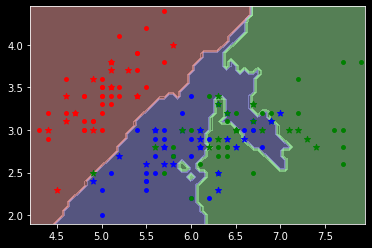

In [16]:
plot_decision_border(clf, x_train, y_train, x_test, y_test)